<a href="https://colab.research.google.com/github/parthatom/Estimation_bias_Q_Learning/blob/main/Maxmin_Qlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
mu = -0.1
N = 3
alpha = 0.01
gamma = 1
epochs = 200
np.random.seed(0)
P = {
    0:{0: (0, 0, True)}, #state:{action: (reward, next state, terminal)}
    1:{0: (mu, 0, False),
       1: (mu, 0, False),
       2: (mu, 0, False),
       3: (mu, 0, False),
       4: (mu, 0, False),
       5: (mu, 0, False),
       6: (mu, 0, False),
       7: (mu, 0, False)}, 
    2:{0: (0, 1, False),
       1: (0, 0, False)}
}

In [11]:
def rewardnstate(a, s):
    r, state, terminal = P[s][a]
    if s==1:
        r = r + np.random.uniform(-1, 1)
    return r, state, terminal

def act_functn(Q, nA):
    eps = 0.1
    #eps = 1/np.power(state_visits[state], 0.2)   
    #eps = 1/np.sqrt(state_visits[state])

    if np.random.choice([True, False], p=[1-eps, eps]):
        action = np.argmax(Q)
    else:
        action = np.random.choice(nA)
    return action

In [58]:
def maxmin_q_train(N, epochs, alpha, gamma, rewardnstate, act_functn, P, seed): 
  np.random.seed(seed)
  Q_list = []
  for i in range(N):
      Q = []
      Q.append([0])#np.random.normal(0, 0.01, [1])
      Q.append(np.random.normal(0, 0.01, [8]))
      Q.append(np.random.normal(0, 0.01, [2]))
      Q_list.append(Q)
  D = [] #replay buffer2
  diff_list = []
  len_d = 0
  for i in range(epochs):
      state = 2
      terminal = False
      #print(Q_list[1][0])
      while not terminal:
          Qmin = []
          nA = len(P[state])
          for i in range(nA):
              m = np.inf
              for Q in Q_list:
                  if m>Q[state][i]:
                      m = Q[state][i]
              Qmin.append(m)
          action = act_functn(Qmin, nA)
          r, next_state, terminal = rewardnstate(action, state)
          # D.append((state, action, r, next_state))
          # len_d += 1
          n = np.random.randint(N)
          # sd, ad, rd, nsd  = D[np.random.choice(len_d)]
          sd, ad, rd, nsd = state, action, r, next_state
          Qmin = []    
          nA = len(P[nsd])
          for i in range(nA):
              m = np.inf
              for Q in Q_list:
                  if m>Q[nsd][i]:
                      m = Q[nsd][i]
              Qmin.append(m)
          Y = rd + gamma*max(Qmin)
          q = Q_list[n][sd][ad]
          Q_list[n][sd][ad] = q + alpha*(Y-q)
          state = next_state
      diff = .0
      for i in range(N):
        diff += Q_list[i][2][0] - Q_list[i][2][1] #preference of right over left
      diff /= float(N)
      diff_list.append(diff)
  return diff_list, Q_list

In [64]:
mu = 0.5
P = {
    0:{0: (0, 0, True)}, #state:{action: (reward, next state, terminal)}
    1:{0: (mu, 0, False),
       1: (mu, 0, False),
       2: (mu, 0, False),
       3: (mu, 0, False),
       4: (mu, 0, False),
       5: (mu, 0, False),
       6: (mu, 0, False),
       7: (mu, 0, False)}, 
    2:{0: (0, 1, False),
       1: (0, 0, False)}
}
diff_list_over, Q_list_over = maxmin_q_train(N = 3, epochs = 10000, 
                                             alpha = 0.01, gamma = 1,  
                                             rewardnstate = rewardnstate, 
                                             act_functn = act_functn, 
                                             P = P, seed = 0)

In [65]:
mu = -0.5
P = {
    0:{0: (0, 0, True)}, #state:{action: (reward, next state, terminal)}
    1:{0: (mu, 0, False),
       1: (mu, 0, False),
       2: (mu, 0, False),
       3: (mu, 0, False),
       4: (mu, 0, False),
       5: (mu, 0, False),
       6: (mu, 0, False),
       7: (mu, 0, False)}, 
    2:{0: (0, 1, False),
       1: (0, 0, False)}
}
diff_list_under, Q_list_under = maxmin_q_train(N = 3, epochs = 10000, 
                                               alpha = 0.01, gamma = 1,  
                                               rewardnstate = rewardnstate, 
                                               act_functn = act_functn, 
                                               P = P, seed = 0)

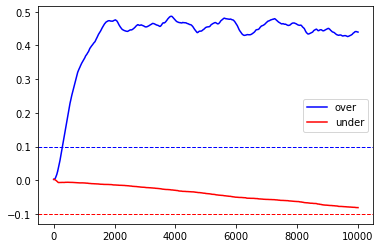

In [66]:
plt.plot(diff_list_over, color = "b", label = "over")
plt.axhline(y = 0.1, color = "b", linestyle = "--", linewidth = 1)
plt.axhline(y = -0.1, color = "r", linestyle = "--", linewidth = 1)
plt.plot(diff_list_under, color = "r", label = "under")
plt.legend()

In [67]:
np.mean(diff_list_over[2000:]) - 0.5

-0.04484936852653865

In [68]:
np.mean(diff_list_under[2000:]) + 0.5

0.4521952749101498

# Grid game

In [6]:
nA = 4
nS = 9
p = 0.8
N = 3
#alpha = 0.001
gamma = 0.95
epochs = 20000

In [7]:
#r1, r2, next_state, terminal: 0: up, 1: down, 2: right, 3: left
# Map = [
#         "CCG",012
#         "CCC",345
#         "SCC",678
#     ]
P = {
    0:{
        0:(-12, 10, 0, False),
        1:(-12, 10, 3, False),
        2:(-12, 10, 1, False),
        3:(-12, 10, 0, False)
    },
    1:{
        0:(-12, 10, 1, False),
        1:(-12, 10, 4, False),
        2:(-12, 10, 2, False),
        3:(-12, 10, 0, False)
    },
    2:{                        #Goal
        0:(5, 5, 9, True),
        1:(5, 5, 9, True),
        2:(5, 5, 9, True),
        3:(5, 5, 9, True)
    },
    3:{
        0:(-12, 10, 0, False),
        1:(-12, 10, 6, False),
        2:(-12, 10, 4, False),
        3:(-12, 10, 3, False)
    },
    4:{
        0:(-12, 10, 1, False),
        1:(-12, 10, 7, False),
        2:(-12, 10, 5, False),
        3:(-12, 10, 3, False)
    },
    5:{
        0:(-12, 10, 2, False),
        1:(-12, 10, 8, False),
        2:(-12, 10, 5, False),
        3:(-12, 10, 4, False)
    },
    6:{                        #Starting state
        0:(-12, 10, 3, False),
        1:(-12, 10, 6, False),
        2:(-12, 10, 7, False),
        3:(-12, 10, 6, False)
    },
    7:{
        0:(-12, 10, 4, False),
        1:(-12, 10, 7, False),
        2:(-12, 10, 8, False),
        3:(-12, 10, 6, False)
    },
    8:{
        0:(-12, 10, 5, False),
        1:(-12, 10, 8, False),
        2:(-12, 10, 8, False),
        3:(-12, 10, 7, False)
    },
    9:{                       #End of episode state
        0:(0, 0, 9, True),
        1:(0, 0, 9, True),
        2:(0, 0, 9, True),
        3:(0, 0, 9, True)
    }
}

In [8]:
def rewardnstate(a, s):
    r1, r2, state, terminal = P[s][a]
    reward = np.random.choice([r1, r2])
    return reward, state, terminal

def act_functn(Q):
    #eps = 0.1
    #eps = 1/np.power(state_visits[state], 0.2)
    eps = 1/np.sqrt(state_visits[state])
    #state_visits[state] += 1
    if np.random.choice([True, False], p=[1-eps, eps]):
        action = np.argmax(Q)
    else:
        action = np.random.choice(nA)
    return action

In [9]:
np.random.seed(1)
Q_list = np.random.rand(N, nS+1, nA)
Q_list[:, nS] = 0
D = [] #replay buffer
len_d = 0
maximal_value = []
count_matrix = np.ones([N, nS, nA])
state_visits = np.ones(nS)
for i in range(5000):
    state = 6
    terminal = False
    while not terminal:
        Qmin = np.empty(nA)
        for i in range(nA):
            m = np.min(Q_list[:, state, i])
            Qmin[i] = m
        action = act_functn(Qmin)
        r, next_state, terminal = rewardnstate(action, state)
        D.append((state, action, r, next_state))
        len_d += 1       
        for k in range(10):
            n = np.random.randint(N)
            sd, ad, rd, nsd  = D[np.random.choice(len_d)]
            Qmin = np.empty(nA)   
            for i in range(nA):
                m = np.min(Q_list[:, nsd, i])
                Qmin[i] = m
            Y = rd + gamma*max(Qmin)
            q = Q_list[n][sd][ad]
            alpha = (1/np.power(count_matrix[n, sd, ad], p))
            Q_list[n][sd][ad] = q + alpha*(Y-q)
            count_matrix[n, sd, ad] += 1
            state_visits[sd] += 1
        state = next_state
    maximal_value.append(np.max(Q_list[:, 6].flatten()))

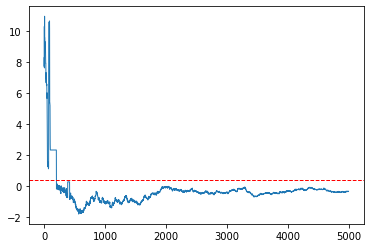

In [10]:
props = {
    "width": 1,
    "headwidth": 10
}

plt.plot(maximal_value, linewidth=1)
plt.axhline(y = 0.36, color = "r", linestyle = "--", linewidth = 1)
#plt.annotate('y = %s' % round(maximal_value_a[-1], 4), xy=(8000, maximal_value_a[-1]), xytext=(9000, -2), arrowprops = props)
plt.show()

In [14]:
(np.mean(maximal_value) - 0.36), (np.mean(maximal_value[2000:]) - 0.36)

(-0.6963045677920221, -0.7138553770291485)

In [12]:
Q_list[:, nsd, :]

array([[-1.91358731, -4.38862993,  3.50343069,  3.47206448],
       [ 0.33068506, -4.95446118,  3.89316071,  4.90219091],
       [-0.20861263, -5.04271798,  3.86657974,  3.32308421]])

In [13]:
len_d

29800